In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from scipy.interpolate import RectBivariateSpline
path = '../PostBornEma/'
sys.path.append("../scripts/") 
from lab import *

### 1) Terms that also appear in Limber approximation

#### Collecting all contributions from Eq.s 4.2-4.5 that are also non-zero in Limber

Term 1:
$- \int_{\vec{l}} [\vec{L}\cdot \vec{l}] [\vec{l}\cdot (\vec{L}-\vec{l})]^2 \int \mathrm{d}\chi \int \mathrm{d}\chi' W(\chi,\chi_{CMB}) W^h(\chi') C_l^{\delta\psi}(\chi',\chi) C_{|\vec{L}-\vec{l}|}^{\phi\phi}(\chi',\chi) = - \int_{\vec{l}} [\vec{L}\cdot \vec{l}] [\vec{l}\cdot (\vec{L}-\vec{l})]^2 M^{A}(l,|\vec{L}-\vec{l}|)$
after  transform $\vec{l} \rightarrow \vec{l}+\vec{L}$

$\int_{\vec{l}} [\vec{L}\cdot  (\vec{L}+\vec{l})] [\vec{l}\cdot (\vec{L}+\vec{l})]^2 M^{A}( |\vec{L}+\vec{l}|,l)$

Term 2: 
$ L^2 \int_{\vec{l}} [\vec{L}\cdot \vec{l}]^2 \int \mathrm{d}\chi \int \mathrm{d}\chi' W(\chi,\chi_{CMB}) W^h(\chi') C_L^{\delta\psi}(\chi',\chi) [\frac{1}{2}C_{l}^{\phi\phi}(\chi')+\frac{1}{2}C_{l}^{\phi\phi}(\chi)]$
$ = L^2 \int_{\vec{l}} [\vec{L}\cdot \vec{l}]^2 \tilde{M}^{A}(L,l)$

Comparison with Limber results suggest that we are missing a minus sign in Term 2. Will be coding with this Minus sign

Adding Term 1 and 2 with trick from Krause & Hirata:
$\int_{\vec{l}} [\vec{L}\cdot  (\vec{L}+\vec{l})] [\vec{l}\cdot (\vec{L}+\vec{l})]^2 [M^{A}( |\vec{L}+\vec{l}|,l)-\tilde{M}^{A}(L,l)] +  \left[\int_{\vec{l}} [\vec{L}\cdot  (\vec{L}+\vec{l})] [\vec{l}\cdot (\vec{L}+\vec{l})]^2-L^2[\vec{L}\cdot \vec{l}]^2\right] \tilde{M}^{A}(L,l)$


In [141]:
# naming corresponds to order of axes
cldeltapsi = np.load('../G_matrices/cldeltapsi.npy')
clphidelta = np.load('../G_matrices/clphidelta.npy')
clphiphi   = np.load('../G_matrices/clphiphi_parallel.npy')
clphipsi   = np.load('../G_matrices/clphipsi.npy')
clphiphi_Limber = np.load('../G_matrices/clphiphi_noLimberCLASS.npy',) #the high ell part is Limber

In [142]:
r2d, t2d = np.meshgrid(t_,t_)
w11, w12 = np.meshgrid(w1,w1)

cl_phiphi_diag= np.zeros((len(ell_),len(t_)))
for ii in range(len(t_)):
    cl_phiphi_diag[:,ii]=clphiphi[:,ii,ii]

cl_phiphi_diag1  = np.zeros((len(ell_),len(t_),len(t_)))
for nn in range(len(ell_)):
    cl_phiphi_diag1[nn]  = np.asarray([cl_phiphi_diag[nn] for ii in range(len(t_))])
cl_phiphi_diag2 = np.swapaxes(cl_phiphi_diag1,1,2)

print(cl_phiphi_diag1[:,:,0]-cl_phiphi_diag2[:,0,:])
#cl_phiphi_diag1(l) changes along last axis (=r2d)
print(cl_phiphi_diag1[:,0]-cl_phiphi_diag1[:,1])
print(r2d[0]-r2d[1])
#cl_phiphi_diag2(l) changes along first axis (t2d)
print(cl_phiphi_diag2[:,:,0]-cl_phiphi_diag2[:,:,1])
print(t2d[:,0]-t2d[:,1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 

In [145]:
# defining new, longer ell variable and splitting it in Limber and post-Limber part
ell_ext = np.linspace(max(ell_)+1,4000)
ell_ext = np.append(ell_,ell_ext)
ind1 = np.where(ell_ext<=900)
ind2 = np.where(ell_ext>900)

In [8]:
# #clphipsi*clphiphi
# clprod1 = np.zeros((len(ell_),len(ell_),len(t_),len(t_)))
# for ii in ind1:
#     for jj in ind1:
#         clprod1[ii][jj] = clphipsi[ii]*clphiphi[jj]

In [159]:
# cldeltapsi*clpp, first axis is chi' second is chi 
clprod2 = np.zeros((len(ell_ext),len(ell_ext),len(t_),len(t_)))
for ii in ind1[0]:
    for jj in ind1[0]:
        clprod2[ii][jj] = cldeltapsi[ii]*clphiphi[jj] 
for ii in ind2[0]:
        clprod2[ii][ii] = clphiphi_Limber[ii] 

(339, 339, 100, 100)


In [156]:
ind1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [10]:
# cldeltapsi*[clpp1+clpp2]
clprod3 = np.zeros((len(ell_),len(ell_),len(t_),len(t_)))
for ii in range(len(ell_)):
    for jj in range(len(ell_)):
        clprod3[ii][jj] = cldeltapsi[ii]*(cl_phiphi_diag1[jj]+cl_phiphi_diag2[jj])*0.5 

In [43]:
#getting MA
bin_num = 'all'

def lensing_kernel(xi, xmax):
    return (xmax - xi)/(xmax*xi) * (xmax > xi)
kernel2 = lsst_kernel_cb
#r2d goes with first axis = delta phi
#t2d goes with second axis = phi phi
r2d, t2d = np.meshgrid(t_,t_)
w11, w12 = np.meshgrid(w1,w1)

kernel_axis1 = lensing_kernel(r2d*t2d*chi_cmb,chi_cmb)
kernel_axis0 = kernel2(r2d*chi_cmb)

res = np.sum(clprod2*(r2d*chi_cmb)*chi_cmb*w11*w12*kernel_axis1*kernel_axis0, axis =(2,3))/4. 
#divided by 4 for Gaussian quadrature
MA  = RectBivariateSpline(ell_,ell_,res)
np.save('../M_matrices/MA_matrix_bin_%s'%str(bin_num),res)
np.save('../M_matrices/MA_slpine_bin_%s'%str(bin_num),MA)

In [117]:
#setting everything beyond l=1000 to zero
#getting MA
bin_num = 'all'

def lensing_kernel(xi, xmax):
    return (xmax - xi)/(xmax*xi) * (xmax > xi)
kernel2 = lsst_kernel_cb
#r2d goes with first axis = delta phi
#t2d goes with second axis = phi phi
r2d, t2d = np.meshgrid(t_,t_)
w11, w12 = np.meshgrid(w1,w1)

kernel_axis1 = lensing_kernel(r2d*t2d*chi_cmb,chi_cmb)
kernel_axis0 = kernel2(r2d*chi_cmb)
res2 = np.zeros((len(ell_),len(ell_)))
for ii in range(len(ell_)):
    for jj in range(len(ell_)):
        if (ell_[ii]<=1000 and ell_[jj]<=1000):
            res2[ii][jj] = np.sum(clprod2[ii][jj]*(r2d*chi_cmb)*chi_cmb*w11*w12*kernel_axis1*kernel_axis0)/4. 
        else:
            res2[ii][jj] = 0.
#divided by 4 for Gaussian quadrature
MA2  = RectBivariateSpline(ell_,ell_,res2)
#np.save('../M_matrices/MA_matrix_bin_%s'%str(bin_num),res)
#np.save('../M_matrices/MA_slpine_bin_%s'%str(bin_num),MA)

/global/homes/v/vboehm/.conda/envs/bccp/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/global/homes/v/vboehm/.conda/envs/bccp/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([[1.93688627e-35]])

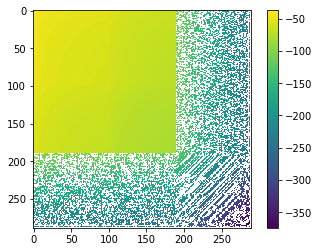

In [125]:
plt.imshow(np.log(tildeMA2(ell_,ell_)))
plt.colorbar()

tildeMA2(1001,1001)

In [47]:
#getting tilde MA
bin_num = 'all'

def lensing_kernel(xi, xmax):
    return (xmax - xi)/(xmax*xi) * (xmax > xi)
kernel2 = lsst_kernel_cb
#r2d goes with first axis = delta phi
#t2d goes with second axis = phi phi
r2d, t2d = np.meshgrid(t_,t_)
w11, w12 = np.meshgrid(w1,w1)

kernel_axis1 = lensing_kernel(r2d*t2d*chi_cmb,chi_cmb)
kernel_axis0 = kernel2(r2d*chi_cmb)

tilderes = np.sum(clprod3*(r2d*chi_cmb)*chi_cmb*w11*w12*kernel_axis1*kernel_axis0, axis =(2,3))/4. 
tildeMA  = RectBivariateSpline(ell_,ell_,res)
np.save('../M_matrices/tildeMA_matrix_bin_%s'%str(bin_num),res)
np.save('../M_matrices/tildeMA_slpine_bin_%s'%str(bin_num),tildeMA)

In [50]:
# Ma and tilde Ma seem not the same...
tilderes/res

array([[  1.87983555,   2.19621949,   2.47908933, ...,  97.58859186,
         97.75826732,  97.92510396],
       [  1.86809554,   2.18041892,   2.46035094, ..., 102.59461266,
        102.77373368, 102.95005836],
       [  1.84321159,   2.14581607,   2.4173241 , ..., 104.02353674,
        104.20597521, 104.38569974],
       ...,
       [  1.28395066,   1.36958529,   1.44222037, ...,  21.37505374,
         21.40544671,  21.43560999],
       [  1.28384678,   1.36944758,   1.44205296, ...,  21.36339917,
         21.39377238,  21.42391609],
       [  1.28374781,   1.36931626,   1.4418932 , ...,  21.35214971,
         21.38250381,  21.41262861]])

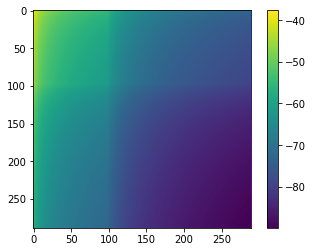

In [48]:
plt.imshow(np.log(res))
plt.colorbar()

In [87]:
tildeMA2(ell_,ell_)-MA2(ell_,ell_)

array([[ 4.04145391e-017,  1.35672938e-017,  5.93876693e-018, ...,
        -2.75924300e-100, -7.14367120e-102,  0.00000000e+000],
       [ 2.44008604e-017,  8.25228085e-018,  3.63314541e-018, ...,
        -5.72784300e-100, -8.09523052e-101,  0.00000000e+000],
       [ 1.63663113e-017,  5.56287669e-018,  2.45862499e-018, ...,
        -4.10370424e-100,  5.78190887e-101,  0.00000000e+000],
       ...,
       [ 1.87267054e-096,  4.69996415e-096, -1.49228434e-096, ...,
         7.61359992e-163,  5.86078967e-163,  0.00000000e+000],
       [-7.49068217e-096,  3.99405514e-096,  1.98971245e-096, ...,
        -6.16468247e-163,  2.77844844e-163,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000]])

## Now that we have $M^A$ s: coding this equations
$\int_{\vec{l}} [\vec{L}\cdot  (\vec{L}+\vec{l})] [\vec{l}\cdot (\vec{L}+\vec{l})]^2 [M^{A}( |\vec{L}+\vec{l}|,l)-\tilde{M}^{A}(L,l)] +  \left[\int_{\vec{l}} [\vec{L}\cdot  (\vec{L}+\vec{l})] [\vec{l}\cdot (\vec{L}+\vec{l})]^2-L^2[\vec{L}\cdot \vec{l}]^2\right] \tilde{M}^{A}(L,l)$

In [52]:
def get_regularized_sum_of_terms(L,L1,phi,M1,M2,method='trapz'):
    nu = np.cos(phi)
    res=[]
    for LL in L:
        resL1=[]
        for LL1 in L1:
            L_= LL*np.sqrt(1.+(LL1/LL)**2+2.*LL1/LL*nu)
            integrand = LL1*(LL**2+LL*LL1*nu)*(LL1**2+LL*LL1*nu)**2*(M1(L_,LL1,grid=False)-M2(LL,LL1,grid=False))
            if method =='simps':
                resL1+=[simps(integrand,phi)]
            elif method =='trapz':
                resL1+=[np.trapz(integrand,phi)]
            elif method =='sum':
                resL1+=[np.sum(integrand*np.diff(phi)[0])]
        res+=[simps(resL1,L1)]
    res=np.asarray(res)/(2*np.pi)**2
    return res


#numerical angular integration
def get_second_sum_of_terms(L,L1,M,method='trapz'):
    nu = np.cos(phi)
    res=[]
    for LL in L:
        resL1=[]
        for LL1 in L1:
            integrand =  LL1*((LL**2+LL*LL1*nu)*(LL1**2+LL*LL1*nu)**2-LL**2*(LL*LL1*nu)**2)*(M(LL,LL1,grid=False))
            if method =='simps':
                resL1+=[simps(integrand,phi)]
            elif method =='trapz':
                resL1+=[np.trapz(integrand,phi)]
            elif method =='sum':
                resL1+=[np.sum(integrand*np.diff(phi)[0])]
        res+=[simps(resL1,L1)]
    res=np.asarray(res)/(2*np.pi)**2
    return res

In [53]:
# use same sampling as in Limber case
L     = np.logspace(1,4,400)

# sampling for integrations
phi = np.linspace(0.,2.*np.pi,1000,endpoint=True)
L1  = np.logspace(-1,5,400)

In [88]:
begin = time.time()
all_bins = get_regularized_sum_of_terms(L,L1,phi,MA2,tildeMA2,method='trapz')+get_second_sum_of_terms(L,L1,tildeMA2,method='trapz')
print(time.time()-begin)

79.4322669506073


In [55]:
L, corrs = np.load('../output/LimberPostBornResultsLSST.npy')

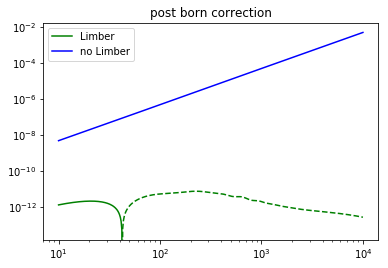

In [56]:
plt.figure()
plt.title('post born correction')
plt.loglog(L,corrs[-1],label='Limber',color='g')
plt.loglog(L,-corrs[-1],color='g',ls='--')
plt.loglog(L,all_bins,label='no Limber',color='b')
plt.loglog(L,-all_bins,color='b',ls='--')
plt.legend()

### Compare only the 31 term, which can be done analytically
$L^2 \int_{\vec{l}} [\vec{L}\cdot \vec{l}]^2 \tilde{M}^{A}(L,l)$

In [94]:
L,Cl31s = np.load('../output/LimberPostBornCl31_kappa-gal.npy')

L,Cl31_cut = np.load('../output/LimberPostBornCl31_kappa-gal_all_cut.npy')

In [89]:
def get_31_term(M,L,L1):
    return L**4/4./np.pi*np.trapz(M(L,L1)*L1**3,L1)

In [90]:
myCl31 = get_31_term(tildeMA2,L,L1)

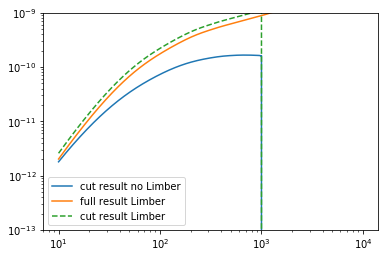

In [101]:
plt.loglog(L,myCl31,label='cut result no Limber')
plt.loglog(L,-Cl31s[-1],label = 'full result Limber' )
plt.loglog(L,-Cl31_cut,label = 'cut result Limber', ls = '--' )
plt.ylim(1e-13,1e-9)
plt.legend()

/global/homes/v/vboehm/.conda/envs/bccp/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/global/homes/v/vboehm/.conda/envs/bccp/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


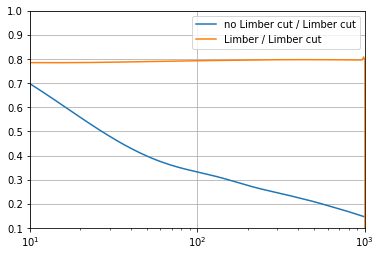

In [112]:
plt.semilogx(L,-myCl31/Cl31_cut, label='no Limber cut / Limber cut')
plt.semilogx(L,Cl31s[-1]/Cl31_cut, label='Limber / Limber cut')
plt.grid()
plt.ylim(0.1,1)
plt.xlim(10,1000)
plt.legend()

In [69]:
MA(2000,2000),MA(3000,3000)

(array([[9.09464536e-40]]), array([[9.09464536e-40]]))

In [116]:
tildeMA2(1002,1002)

array([[1.56835624e-35]])